<a href="https://colab.research.google.com/github/Zuyuf/Machine_Learning_Specialization/blob/main/1-Machine_Learning_Foundation/6%20-%20WEEK%206%20-%20Deep%20Learning%20Searching%20for%20Images/3_WEEK_6_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Turicreate and connect to drive

In [1]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 46kB/s 
     |████████████████████████████████| 86.4MB 109kB/s 
     |████████████████████████████████| 327kB 43.9MB/s 
     |████████████████████████████████| 3.4MB 39.9MB/s 
     |████████████████████████████████| 3.8MB 42.8MB/s 
     |████████████████████████████████| 450kB 39.2MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320848 sha256=e5f0b7e81dfc8d64346dea7c6fb3fb8578d89a0b5953efaf2952337b87cb906a
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=bf82a3a0134108f84ea231ddb6fdef9a4b9cace29b17b14d9f1ba4bbc1c6120c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2,

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import turicreate

# Task 1: Compute summary statistics of the data


### **QUESTION 1:** What is the least common category in the training data?

In [11]:
image_train = turicreate.SFrame('/content/gdrive/My Drive/Turicreate/Week 6/image_train_data/')
image_test = turicreate.SFrame('/content/gdrive/My Drive/Turicreate/Week 6/image_test_data/')
image_data = image_train.append(image_test)
print(len(image_train), len(image_data))

2005 6005


In [12]:
sketch = turicreate.Sketch(image_data['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  6005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  1509 |
|    dog     |  1509 |
| automobile |  1509 |
|    bird    |  1478 |
+------------+-------+


**Bird** has least common Category

# Task 2: Create category-specific image retrieval models

In [13]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [50]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [18]:
cat_train_data = image_train[ image_train['label'] == 'cat' ]
cat_test_data = image_test[ image_test['label'] == 'cat' ]

dog_train_data = image_train[ image_train['label'] == 'dog' ]
dog_test_data = image_test[ image_test['label'] == 'dog' ]

car_train_data = image_train[ image_train['label'] == 'automobile' ]
car_test_data = image_test[ image_test['label'] == 'automobile' ]

bird_train_data = image_train[ image_train['label'] == 'bird' ]
bird_test_data = image_test[ image_test['label'] == 'bird' ]

In [19]:
cat_model = turicreate.nearest_neighbors.create(cat_train_data, features = ['deep_features'], label = 'id')
dog_model = turicreate.nearest_neighbors.create(dog_train_data, features = ['deep_features'], label = 'id')
car_model = turicreate.nearest_neighbors.create(car_train_data, features = ['deep_features'], label = 'id')
bird_model = turicreate.nearest_neighbors.create(bird_train_data, features = ['deep_features'], label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

### What is the nearest cat-labeled image in the training data to the cat image that is the first image in the test data ?

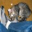

In [84]:
cat1 = image_test[0:1]
cat1[0]['image']

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 21.783ms     |

| Done         |         | 100         | 89.032ms     |

+--------------+---------+-------------+--------------+

,id,image,label,deep_features,image_array
0,331,,cat,"[0.0, 0.0, 0.5109639167785645, 0.0, 0.0, 0.0, 11.272439956665039, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1253304481506348, 0.0, 0.5219167470932007, 0.5971229076385498, 0.0, 0.6972668170928955, 0.0, 0.24001091718673706, 0.0, 1.0731264352798462, 0.0, 0.0, 0.10970926284790039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6569366455078125, 0.0, 0.0, 0.0, 0.0, 1.0214426517486572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2922544479370117, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8759312629699707, 0.8046186566352844, 0.0, 1.5726779699325562, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1985647678375244, 0.0, 0.0, 2.738689422607422, 0.0, 0.0, 0.0, 0.48699140548706055, 0.023147881031036377, 0.0, 0.16829437017440796, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8470346331596375, 1.0001214742660522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[45.0, 65.0, 92.0, 72.0, 95.0, 110.0, 106.0, 132.0, 129.0, 106.0, 132.0, 129.0, 109.0, 134.0, 131.0, 111.0, 137.0, 134.0, 111.0, 139.0, 135.0, 115.0, 145.0, 142.0, 91.0, 112.0, 107.0, 85.0, 100.0, 96.0, 92.0, 113.0, 110.0, 84.0, 102.0, 99.0, 116.0, 141.0, 138.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 123.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 123.0, 148.0, 144.0, 123.0, 147.0, 144.0, 123.0, 147.0, 143.0, 122.0, 150.0, 146.0, 108.0, 104.0, 113.0, 93.0, 45.0, 73.0, 72.0, 38.0, 64.0, 41.0, 23.0, 43.0, 23.0, 18.0, 24.0, 36.0, 31.0, 20.0, 52.0, 44.0, 29.0, 46.0, 67.0, 96.0, 76.0, ...]"
1,16289,,cat,"[0.964287519454956, 0.0, 0.0, 0.0, 1.1251550912857056, 0.0, 9.312150955200195, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9964497089385986, 0.20313739776611328, 0.0, 1.9780253171920776, 0.8170939683914185, 0.0, 0.0, 0.0, 0.0, 1.7009224891662598, 0.5013698935508728, 0.0, 0.0, 0.0, 1.9672785997390747, 0.0, 0.0, 0.0, 0.0, 1.1179927587509155, 0.12306243181228638, 0.0, 0.0, 0.013147711753845215, 0.0, 0.0, 1.0392909049987793, 0.9930934309959412, 0.0, 0.0, 0.22333812713623047, 0.009367823600769043, 0.0, 0.0, 0.0, 0.0, 0.13046950101852417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5344581604003906, 0.0, 0.0, 0.0, 1.211628794670105, 0.0, 0.0, 0.6291561126708984, 0.35370469093322754, 0.5080443620681763, 2.374500274658203, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6534329056739807, 0.0, 0.0, 2.430657386779785, 0.0, 0.0, 0.0, 0.11062061786651611, 0.4345150589942932, 0.0, 0.0, 0.1659744381904602, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025784790515899658, 0.5490762591362, 0.21386826038360596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[215.0, 219.0, 231.0, 215.0, 219.0, 232.0, 216.0, 219.0, 233.0, 214.0, 217.0, 230.0, 213.0, 216.0, 230.0, 209.0, 215.0, 226.0, 208.0, 217.0, 221.0, 206.0, 215.0, 219.0, 201.0, 208.0, 217.0, 197.0, 203.0, 218.0, 194.0, 200.0, 221.0, 199.0, 204.0, 221.0, 142.0, 128.0, 131.0, 76.0, 46.0, 46.0, 81.0, 55.0, 57.0, 147.0, 136.0, 139.0, 160.0, 149.0, 154.0, 152.0, 141.0, 144.0, 156.0, 147.0, 150.0, 159.0, 148.0, 154.0, 160.0, 153.0, 157.0, 164.0, 156.0, 160.0, 160.0, 154.0, 158.0, 158.0, 151.0, 156.0, 159.0, 149.0, 157.0, 159.0, 150.0, 156.0, 157.0, 147.0, 154.0, 156.0, 145.0, 153.0, 152.0, 142.0, 149.0, 147.0, 137.0, 143.0, 141.0, 131.0, 136.0, 142.0, 131.0, 136.0, 215.0, 219.0, 231.0, 215.0, ...]"
2,25713,,cat,"[0.5369712710380554, 0.0, 0.0, 0.08944588899612427, 0.2364743947982788, 0.3688161373138428, 9.64945125579834, 0.0, 0.0, 0.0, 0.0, 0.0, 1.345590353012085, 0.7391354441642761, 0.0, 0.0, 0.4072381854057312, 0.8558321595191956, 0.0, 0.0, 0.0, 1.1061797142028809, 0.0, 0.0, 0.0, 0.13240057229995728, 0.1410961151123047, 0.0, 0.0, 0.0, 0.0, 0.7048135995864868, 0.0, 0.0, 0.0, 0.24006950855255127, 0.0, 0.0, 0.6994016766548157, 1.6008036136627197, 0.0, 0.0, 0.0, 0.0, 0.23141270875930786, 0.0, 0.0, 0.0, 0.9568823575973511, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04671293497085571, 0.0, 0.6259481906890869, 0.0, 0.0, 2.228186845779419, 0.0, 0.0, 0.0683944821357727, 0.0, 0.0, 0.8954511880874
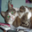
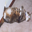
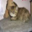
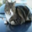
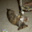

In [83]:
#image_test[ image_test['id'] == cat1['id'] ][0]['image']
cat_result = cat_model.query(cat1)
result1 = get_images_from_ids( cat_result )
result1.explore()

### What is the nearest dog-labeled image in the training data to the cat image that is the first image in the test data?

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 23.827ms     |

| Done         |         | 100         | 104.178ms    |

+--------------+---------+-------------+--------------+

,id,image,label,deep_features,image_array
0,6094,,dog,"[0.470533549785614, 0.0, 0.0, 0.0, 0.0, 0.0, 9.278953552246094, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22425848245620728, 0.0, 0.6744542717933655, 0.0, 1.6140201091766357, 0.0, 2.0357017517089844, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.427365779876709, 0.568508505821228, 0.0, 0.0, 1.7979466915130615, 1.4885543584823608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.44374212622642517, 0.0, 0.0, 0.0, 0.0, 0.0, 1.018580436706543, 0.0, 0.0, 0.0, 0.0, 0.0, 2.99509596824646, 0.0, 0.0, 0.4832870364189148, 0.0, 0.3561042547225952, 0.0, 2.4157166481018066, 1.0644227266311646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.040470600128174, 0.8788043856620789, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[91.0, 98.0, 71.0, 138.0, 123.0, 63.0, 135.0, 115.0, 50.0, 116.0, 99.0, 54.0, 118.0, 101.0, 54.0, 114.0, 99.0, 56.0, 101.0, 86.0, 55.0, 100.0, 88.0, 62.0, 95.0, 86.0, 58.0, 93.0, 84.0, 56.0, 93.0, 84.0, 56.0, 102.0, 91.0, 67.0, 114.0, 99.0, 80.0, 121.0, 101.0, 71.0, 124.0, 96.0, 59.0, 122.0, 88.0, 49.0, 123.0, 88.0, 47.0, 124.0, 94.0, 56.0, 117.0, 91.0, 55.0, 125.0, 95.0, 57.0, 122.0, 90.0, 49.0, 114.0, 86.0, 49.0, 110.0, 86.0, 51.0, 109.0, 79.0, 42.0, 100.0, 70.0, 27.0, 99.0, 74.0, 29.0, 104.0, 73.0, 29.0, 117.0, 79.0, 29.0, 138.0, 96.0, 37.0, 139.0, 94.0, 41.0, 131.0, 92.0, 43.0, 105.0, 74.0, 29.0, 96.0, 102.0, 70.0, 126.0, ...]"
1,13387,,dog,"[0.36649417877197266, 0.0, 0.0, 0.0, 0.0, 0.0, 8.915741920471191, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5137600898742676, 0.0, 0.0, 0.673179030418396, 0.0, 0.0, 0.0, 0.0, 0.0, 1.791056752204895, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25842756032943726, 0.0, 0.0, 0.0, 0.24773627519607544, 0.06141239404678345, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0704283714294434, 1.1447938680648804, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13471126556396484, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9594002962112427, 0.703919529914856, 0.31422656774520874, 2.0758111476898193, 0.0, 0.0, 0.0, 0.0, 0.0, 1.373142957687378, 0.0, 0.0, 2.209083080291748, 0.0, 0.0, 0.0, 0.7403751611709595, 0.2639371156692505, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3191516399383545, 0.9088151454925537, 0.21029609441757202, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 253.0, 254.0, 254.0, 253.0, 253.0, 253.0, 250.0, 249.0, 249.0, 249.0, 248.0, 248.0, 248.0, 248.0, 247.0, 248.0, 245.0, 240.0, 247.0, 239.0, 229.0, 243.0, 226.0, 205.0, 227.0, 204.0, 176.0, 219.0, 201.0, 178.0, 219.0, 202.0, 183.0, 216.0, 196.0, 180.0, 207.0, 186.0, 176.0, 195.0, 182.0, 173.0, 183.0, 170.0, 161.0, 179.0, 166.0, 154.0, 175.0, 161.0, 147.0, 176.0, 160.0, 149.0, 183.0, 162.0, 155.0, 155.0, 140.0, 133.0, 255.0, 255.0, 255.0, 242.0, ...]"
2,16976,,dog,"[0.7555953860282898, 0.0, 0.0, 0.0, 0.0, 0.0, 9.460389137268066, 0.12622767686843872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09528166055679321, 0.0, 0.4171280264854431, 0.0, 0.0, 0.0, 0.08742207288742065, 0.0, 0.0, 0.0, 0.0, 0.5559314489364624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4493837356567383, 0.24993890523910522, 0.0, 0.0, 0.5614703893661499, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6808208227157593, 0.0, 0.0, 0.0, 0.127973735332489, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1695382595062256, 0.0, 0.0, 0.9742746353149414, 0.0, 0.0, 0.0, 0.8248510956764221, 2.490147113800049, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.3068113327026367, 0.5234540700912476, 0.16325676441192627, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[16.0, 17.0, 11.0, 18.0, 19.0, 13.0, 20.0, 21.0, 15.0, 24.0, 25.0, 19.0, 26.0, 27.0, 21.0, 22.0, 23.0, 17.0, 19.0, 20.0, 14.0, 19.0, 20.0, 15.0, 16.0
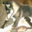
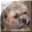
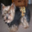
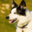
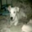
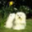

In [85]:
#image_test[ image_test['id'] == cat1['id'] ][0]['image']
dog_result = dog_model.query(cat1)
result2 = get_images_from_ids( dog_result )
result2.explore()

# Task 3: Try a simple example of nearest-neighbors classification

- For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘cat’ in the training data (similar to what you did in the previous question).
- For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘dog’ in the training data (similar to what you did in the previous question).

### On average, is the first image in the test data closer to its five nearest neighbors in the ‘cat’ data or in the ‘dog’ data?

In [71]:
sum(cat_result['distance']) / len(cat_result)

36.15573070978294

In [72]:
sum(dog_result['distance']) / len(cat_result)

37.77071136184157

**Cat** is closer to the first image of cat

# Task 4: Compute nearest neighbors accuracy

Next you'll find nearest neighbors in the training set for each part of the test set

Thus far you queried the nearest neighbors models with a single image as the input, but you can actually query with a whole set of data. The query will find the nearest neighbors for each data point. Note that the input index is stored in the query_labelcolumn of the resulting SFrame.

Using this knowledge find the closest neighbor to the dog test data using each of the trained models

In [73]:
dog_cat_neighbors = cat_model.query(dog_test_data, k=1)
dog_car_neighbors = car_model.query(dog_test_data, k=1)
dog_bird_neighbors = bird_model.query(dog_test_data, k=1)
dog_dog_neighbors = dog_model.query(dog_test_data, k=1)
dog_bird_neighbors

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 799.895ms    |

| Done         | 509000  | 100         | 801.382ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 671.243ms    |

| Done         | 509000  | 100         | 721.767ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 649.971ms    |

| Done         | 478000  | 100         | 674.094ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 647.209ms    |

| Done         | 509000  | 100         | 717.018ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,44658,41.75386473035126,1
1,9215,41.3382958924861,1
2,36675,38.615759085289056,1
3,12582,37.08922699538214,1
4,36122,38.27228869398105,1
5,8736,39.146208923590486,1
6,38991,40.523040105962316,1
7,44177,38.19479183926956,1
8,4549,40.156713166131446,1
9,40225,45.55979626027668,1


### How many of the test set dog images are closer to a dog in the training set than to a cat, automobile, or bird?

In [74]:
dog_distances = turicreate.SFrame({'dog-cat': dog_cat_neighbors['distance'],
                                'dog-car': dog_car_neighbors['distance'],
                                'dog-bird': dog_bird_neighbors['distance'],
                                'dog-dog': dog_dog_neighbors['distance'] })
dog_distances

dog-bird,dog-car,dog-cat,dog-dog
41.75386473035126,41.95797614571203,36.419607706754384,33.47735903726335
41.3382958924861,46.00213318067788,38.83532688735542,32.84584956840554
38.615759085289056,42.946229069238804,36.97634108541546,35.03970731890584
37.08922699538214,41.68660600484793,34.575007291446106,33.90103276968193
38.27228869398105,39.22696649347584,34.77882479101661,37.484925090925636
39.146208923590486,40.58451176980721,35.11715782924591,34.94516534398124
40.523040105962316,45.10673529610854,40.60958309132649,39.095727834463545
38.19479183926956,41.32211409739762,39.90368673062214,37.76961310322034
40.156713166131446,41.82446549950164,38.067470016821176,35.10891446032838
45.55979626027668,45.497692940110376,42.72587329506032,43.242283258453455


In [75]:
def is_dog_correct(row):
  if row['dog-dog'] < row['dog-cat'] and row['dog-dog'] < row['dog-car'] and row['dog-dog'] < row['dog-bird']:
    return 1
  return 0

### Computing the number of correct predictions for ‘dog’

In [76]:
 result3 =  dog_distances.apply(is_dog_correct)

In [77]:
sum(result3)

678

**678** of the test set dog images are closer to a dog in the training set than to a cat, automobile, or bird

In [79]:
len(dog_test_data)

1000

accuracy = No. Correctly classified / No. Dog labeled images  * 100

In [86]:
678 / 1000 * 100

67.80000000000001